# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [1]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, get_dataset_info, get_loader
from HOTS.network import network
import tonic

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (16,16)
max_duration = 1e3
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_cla = 200*patch_size[0]*patch_size[1]*2

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

number of samples in the trainset: 5893
number of samples in the testset: 1995
----------------------------------------
mean value for the recording time: 268802.247 ms
mean value for the number of events: 2215
mean value for the interspike interval: 20281 us
----------------------------------------


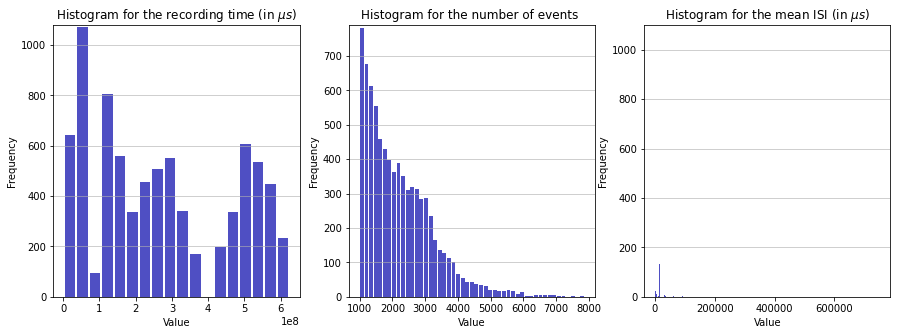

In [2]:
get_dataset_info(trainset, testset)

## Train MLR model on the raw stream of events

In [11]:
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=10)

Number of training samples: 302
device -> cuda - num workers -> 0


  3%|████▍                                                                                                                                            | 1/33 [00:22<12:03, 22.60s/it]

loss for epoch number 0: 0.0035302617098956794


  6%|████████▊                                                                                                                                        | 2/33 [00:46<12:10, 23.55s/it]

loss for epoch number 1: 0.0035013319945741504


  9%|█████████████▏                                                                                                                                   | 3/33 [01:09<11:34, 23.16s/it]

loss for epoch number 2: 0.018663120922690818


 12%|█████████████████▌                                                                                                                               | 4/33 [01:33<11:19, 23.43s/it]

loss for epoch number 3: 0.01441721234289256


 15%|█████████████████████▉                                                                                                                           | 5/33 [01:57<10:59, 23.55s/it]

loss for epoch number 4: 0.005109031846102594


 18%|██████████████████████████▎                                                                                                                      | 6/33 [02:20<10:32, 23.43s/it]

loss for epoch number 5: 0.009133990632513085


 21%|██████████████████████████████▊                                                                                                                  | 7/33 [02:44<10:12, 23.58s/it]

loss for epoch number 6: 0.0026629679602835966


 24%|███████████████████████████████████▏                                                                                                             | 8/33 [03:08<09:54, 23.77s/it]

loss for epoch number 7: 0.0046649955650093725


 27%|███████████████████████████████████████▌                                                                                                         | 9/33 [03:34<09:48, 24.53s/it]

loss for epoch number 8: 0.0017660547084952748


 30%|███████████████████████████████████████████▋                                                                                                    | 10/33 [04:00<09:30, 24.80s/it]

loss for epoch number 9: 0.011014262563804281


 33%|████████████████████████████████████████████████                                                                                                | 11/33 [04:24<09:04, 24.76s/it]

loss for epoch number 10: 0.004613846246289328


 36%|████████████████████████████████████████████████████▎                                                                                           | 12/33 [04:48<08:35, 24.54s/it]

loss for epoch number 11: 0.0014786124210503506


 39%|████████████████████████████████████████████████████████▋                                                                                       | 13/33 [05:09<07:48, 23.42s/it]

loss for epoch number 12: 0.0015155059998713477


 42%|█████████████████████████████████████████████████████████████                                                                                   | 14/33 [05:30<07:08, 22.57s/it]

loss for epoch number 13: 0.0011599787510099132


 45%|█████████████████████████████████████████████████████████████████▍                                                                              | 15/33 [05:54<06:54, 23.03s/it]

loss for epoch number 14: 0.0033555162736488876


 48%|█████████████████████████████████████████████████████████████████████▊                                                                          | 16/33 [06:17<06:30, 22.96s/it]

loss for epoch number 15: 0.0007099445674414528


 52%|██████████████████████████████████████████████████████████████████████████▏                                                                     | 17/33 [06:41<06:13, 23.34s/it]

loss for epoch number 16: 0.0002842249168484507


 55%|██████████████████████████████████████████████████████████████████████████████▌                                                                 | 18/33 [07:06<05:58, 23.88s/it]

loss for epoch number 17: 0.04293178526423789


 58%|██████████████████████████████████████████████████████████████████████████████████▉                                                             | 19/33 [07:29<05:32, 23.77s/it]

loss for epoch number 18: 0.00046030630866613834


 61%|███████████████████████████████████████████████████████████████████████████████████████▎                                                        | 20/33 [07:51<05:00, 23.12s/it]

loss for epoch number 19: 0.0003604986471162133


 64%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 21/33 [08:15<04:41, 23.49s/it]

loss for epoch number 20: 0.0005993501707555117


 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 22/33 [08:39<04:20, 23.65s/it]

loss for epoch number 21: 0.002586053287760717


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 23/33 [09:00<03:45, 22.59s/it]

loss for epoch number 22: 0.08314287252282715


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 24/33 [09:25<03:29, 23.33s/it]

loss for epoch number 23: 0.009039983990456812


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 25/33 [09:50<03:10, 23.82s/it]

loss for epoch number 24: 0.005884317670557399


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 26/33 [10:12<02:43, 23.29s/it]

loss for epoch number 25: 4.687896491308376


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 27/33 [10:36<02:21, 23.50s/it]

loss for epoch number 26: 0.0005708084437966538


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 28/33 [10:58<01:56, 23.23s/it]

loss for epoch number 27: 0.008369633343666565


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 29/33 [11:21<01:32, 23.15s/it]

loss for epoch number 28: 0.01613587532106925


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 30/33 [11:46<01:11, 23.69s/it]

loss for epoch number 29: 0.330182478438517


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 31/33 [12:11<00:48, 24.13s/it]

loss for epoch number 30: 0.002869011945102578


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 32/33 [12:32<00:23, 23.09s/it]

loss for epoch number 31: 0.0006568974807988653


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [12:57<00:00, 23.55s/it]

loss for epoch number 32: 0.0019440217207972214


In [12]:
likelihood, true_target = predict_data(path, date, tau_cla, patch_size=patch_size, kfold=10)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:51<00:00,  8.63s/it]


Mean accuracy: 66.9%


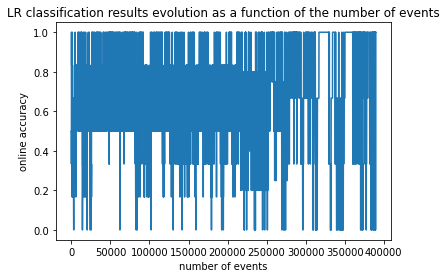

In [13]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

Mean accuracy: 75.7%


/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:321: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


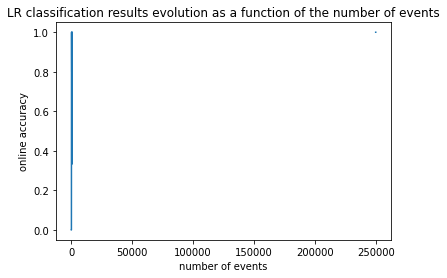

In [14]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=0.9)

## Train MLR model on the output of HOTS network (classic architecture)
### 1. Train the network

In [3]:
kfold = 20
loader = get_loader(trainset, kfold=kfold)
print(f'Size of Dataloader: {len(loader)} samples')

Size of Dataloader: 155 samples


In [ ]:
prototau = 10

timestr = f'2022-01-03_synthetic_{patch_size}_{max_duration}'
name = 'homhots'
tau = (prototau*2,prototau*4,prototau*8)
homeo = (4,1)
learn = True

hots = network(name=name, tau=tau, homeo=homeo, timestr=timestr)
hots.running(loader, trainset.ordering, trainset.classes, learn=learn)
hots.plotlayer();

  0%|                                                                                                                                                        | 0/155 [00:00<?, ?it/s]

[]
[]
[]
[]
[]
[]
[]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[]
[]
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[]
[]
[0.         0.         0.         0.         0.         0.44932896
 0.44932896 0.44932896 0.44932896 0.         0.         1.
 1.         0.         0.         0.44932896 0.44932896 0.4493